# Here I will visualize my results by loading csv files from home/resuls

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%cd
%cd results

/home/samuel
/home/samuel/results


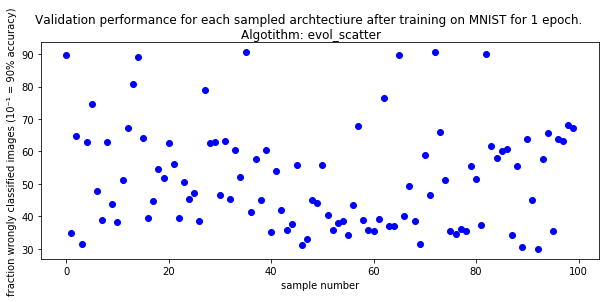

best archtecture from RS:  epochs               5
block            basic
group_size          32
n_filters           16
filter_upd           2
n_blocks1            0
n_blocks2            1
n_blocks3            8
n_blocks4            7
conv0                3
pool                no
reduce             yes
Value            29.86
Timestamp     26329975
Name: 92, dtype: object


In [3]:
# I have to make a nice way to sort the data since the randomly generated points are in reversed order in
def make_scatter(data, color, name):
    scores = np.zeros((len(data),2))

    best = (-1, 100)
    for i in range(len(data)):
        value = data['Value'].iloc[i]
        if value < best[1]:
            best = (i, value)
        scores[i, :] = [i, value]  # RS is saved  in reversed order
        
    

    # view data. I plot in logscale to easier see differnce between good samples
    plt.figure(figsize=(10,4))
    plt.scatter(scores[:,0], scores[:,1], color = color)
    #plt.yscale('log')
    
    plt.suptitle('Validation performance for each sampled archtectiure after training on MNIST for 1 epoch. \nAlgotithm: '+ name)
    plt.xlabel('sample number')
    plt.ylabel('fraction wrongly classified images (10⁻¹ = 90% accuracy)')
    plt.savefig(name)

    plt.show()

    return best

#legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C0')

data = pd.read_csv('resnextNRE20_80.csv')     
bestRS = make_scatter(data, 'blue', 'evol_scatter')

best_arch_RS = data.iloc[bestRS[0]]

print('best archtecture from RS: ', best_arch_RS)

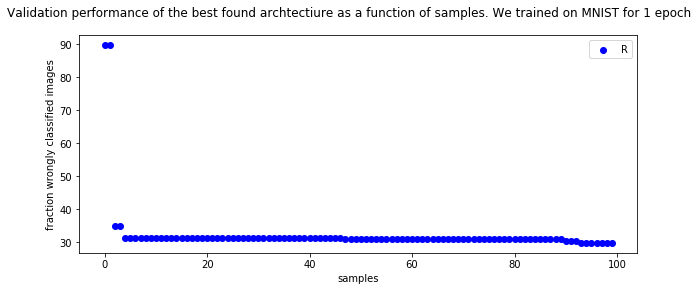

In [4]:
#data = pd.read_csv ('mnist_BO_10+40.csv')   

scores = np.zeros((len(data),2))
scores[0, :] = [0, data['Value'].iloc[0]]

for i in range(1, len(data)):
    scores[i, :] = [i, min(data['Value'].iloc[0:i])] # data is stored reversed
    

# view data. I plot in logscale to easier see differnce between good samples
plt.figure(figsize=(10,4))

plt.scatter(scores[:,0], scores[:,1], color = "blue")
#plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
plt.suptitle('Validation performance of the best found archtectiure as a function of samples. We trained on MNIST for 1 epoch')
plt.xlabel('samples')
plt.ylabel('fraction wrongly classified images')
#plt.title('Regression Analysis')
#plt.text(1.0, 0, 'Loss = %.4f' % loss,
            #fontdict={'size': 24, 'color':  'red'})
#plt.yscale('log')
plt.legend(('Random Search'))
plt.savefig('evol_running_best')

plt.show()

In [6]:
%ls

evol_running_best.png  mnist_RS_100.csv     RS100_running_best.png
evol_scatter.png       resnextNRE20_80.csv  RS100_scatter.png
evolution_output.png   resnextRS100.csv


In [7]:
type(best_arch_RS)

pandas.core.series.Series

In [8]:
best_arch_RS.array


<PandasArray>
[5, 'basic', 32, 16, 2, 0, 1, 8, 7, 3, 'no', 'yes', 29.86, 26329975]
Length: 14, dtype: object

In [31]:
best_arch_RS.reduce

'yes'

In [12]:
best = (-1, 100)
for i in range(len(data)):
    value = data['Value'].iloc[i]
    if value < best[1] and i != 92:
        best = (i, value)
best    

(89, 30.56)

In [13]:
data.iloc[best[0]]


epochs               5
block            basic
group_size          32
n_filters           16
filter_upd           2
n_blocks1            0
n_blocks2            1
n_blocks3           10
n_blocks4            7
conv0                3
pool                no
reduce             yes
Value            30.56
Timestamp     25325621
Name: 89, dtype: object